In [1]:
import numpy as np 
from helpers import * 
from implementations import *
from utilities import *

import matplotlib.pyplot as plt

In [3]:
MAX_ROWS = 5000

x_data = np.genfromtxt('data/dataset/x_train.csv', delimiter=",", skip_header=1,  max_rows=MAX_ROWS)
y_data = np.genfromtxt('data/dataset/y_train.csv', delimiter=",", skip_header=1,  max_rows=MAX_ROWS)

x_data = reduced_data(x_data, t= 0.8)

y_data = clean_Y(y_data)
x_data = clean_X_0(x_data)

x_train, x_test, y_train, y_test = split_data(x_data, y_data, 0.8)

In [5]:
def dimensionality_reduction(x_train, number_of_features):
    normalized_x = normalize(x_train)
    cov_matrix = np.cov(normalized_x, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    k = number_of_features  # Replace with the desired number of components
    top_eigenvalue_indices = eigenvalue_indices[:k]
    top_eigenvectors = eigenvectors[:, top_eigenvalue_indices]
    reduced_data = np.dot(normalized_x, top_eigenvectors)
    return reduced_data

In [8]:
# hyperparamter tuning
x_data = dimensionality_reduction(x_data, 200)
x_balanced, y_balanced = (x_data, y_data)

N, D = x_balanced.shape
initial_w = np.random.rand(D)

hyperparameter_tuning(x_balanced, y_balanced, reg_logistic_regression,lambdas= [0, 0.00001] , gammas=[0.01, 0.1], model_params={'initial_w': initial_w ,'max_iters': 10000})

# all
#  lambda= 0 gamma= 0.01 , CV accuracy = 0.9052, f1_score = 0.2321
#  lambda= 1e-05 gamma= 0.01 , CV accuracy = 0.9070, f1_score = 0.2554
#  lambda= 0 gamma= 0.1 , CV accuracy = 0.9066, f1_score = 0.2704
#  lambda= 1e-05 gamma= 0.1 , CV accuracy = 0.9098, f1_score = 0.2838

# 200
#  lambda= 0 gamma= 0.01 , CV accuracy = 0.5758, f1_score = 0.2642
#  lambda= 1e-05 gamma= 0.01 , CV accuracy = 0.5760, f1_score = 0.2676

# 150 
#  lambda= 0 gamma= 0.01 , CV accuracy = 0.5882, f1_score = 0.2759
#  lambda= 1e-05 gamma= 0.01 , CV accuracy = 0.5822, f1_score = 0.2684
#  lambda= 0 gamma= 0.1 , CV accuracy = 0.5970, f1_score = 0.2794
#  lambda= 1e-05 gamma= 0.1 , CV accuracy = 0.5838, f1_score = 0.2708

 lambda= 0 gamma= 0.01 , CV accuracy = 0.5758, f1_score = 0.2642
 lambda= 1e-05 gamma= 0.01 , CV accuracy = 0.5760, f1_score = 0.2676


KeyboardInterrupt: 

In [8]:
N, D = x_train.shape
initial_w = np.random.rand(D)

# x_data = dimensionality_reduction(x_train, 200)

w, loss = reg_logistic_regression(y_train.reshape(-1, 1), x_train, 1e-5, initial_w.reshape(-1, 1), 10000, 0.1)

/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))


[[0.2        0.38541667]
 [0.21       0.39153439]
 [0.22       0.38709677]
 [0.23       0.38251366]
 [0.24       0.36363636]
 [0.25       0.36686391]
 [0.26       0.37125749]
 [0.27       0.37575758]
 [0.28       0.3803681 ]
 [0.29       0.3625    ]
 [0.3        0.3566879 ]
 [0.31       0.33548387]
 [0.32       0.34437086]
 [0.33       0.34013605]
 [0.34       0.35211268]
 [0.35       0.33823529]
 [0.36       0.34328358]
 [0.37       0.34586466]
 [0.38       0.33846154]
 [0.39       0.33070866]
 [0.4        0.33870968]
 [0.41       0.33870968]
 [0.42       0.32520325]
 [0.43       0.32786885]
 [0.44       0.31404959]
 [0.45       0.31666667]
 [0.46       0.30769231]
 [0.47       0.26548673]
 [0.48       0.25454545]
 [0.49       0.26415094]
 [0.5        0.26415094]
 [0.51       0.26923077]
 [0.52       0.27184466]
 [0.53       0.26      ]
 [0.54       0.26      ]
 [0.55       0.26262626]
 [0.56       0.24489796]
 [0.57       0.24742268]
 [0.58       0.23157895]
 [0.59       0.23157895]]

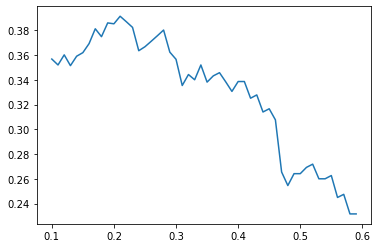

In [9]:
f1_scores = []
for threshold in np.arange(0.1, 0.6, 0.01).tolist(): 
    y_pred = (sigmoid(x_test @ w) >= threshold).flatten() 
    f1_scores.append([threshold, compute_f1(y_test, y_pred)])

f1_scores = np.array(f1_scores)
print(f1_scores[10:])
plt.plot(f1_scores[:, 0], f1_scores[:, 1])


In [32]:
def dimensionality_reduction(x_train, number_of_features):
    normalized_x = normalize(x_train)
    cov_matrix = np.cov(normalized_x, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    k = number_of_features  # Replace with the desired number of components
    top_eigenvalue_indices = eigenvalue_indices[:k]
    top_eigenvectors = eigenvectors[:, top_eigenvalue_indices]
    reduced_data = np.dot(normalized_x, top_eigenvectors)
    return reduced_data

In [9]:
x_test = np.genfromtxt('data/dataset/x_test.csv', delimiter=",", skip_header=1)
x_data = np.genfromtxt('data/dataset/x_train.csv', delimiter=",", skip_header=1)
y_data = np.genfromtxt('data/dataset/y_train.csv', delimiter=",", skip_header=1)
print('data loaded')

y_data = clean_Y(y_data)
x_data = clean_X_0(x_data)
x_test = clean_X_0(x_test)
print('data cleaned')

x_train_balanced, y_train_balanced = (x_data, y_data)
x_train_balanced = dimensionality_reduction(x_train_balanced, 150)
print('not balanced')

N, D = x_train_balanced.shape
initial_w = np.random.rand(D)

w, loss = reg_logistic_regression(y_train_balanced.reshape(-1, 1), x_train_balanced, 1e-5, initial_w.reshape(-1, 1), 10000, 0.1)
print('trained')



KeyboardInterrupt: 

In [ ]:
pred = predict_logistic(x_test, w)
pred = np.where(pred, 1, -1)